# One-way ANOVA In R

[ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) is an **AN**alysis **O**f **VA**riance. It is a test to determine if there is a significant difference between the means of two or more populations. It describes the variance within groups and the variance between groups. It tests the null hypothesis which states that all population means are equal while the alternative hypothesis states that at least one is different. One-way ANOVA is used to test groups with only one response variable.

- H0 null hypotesis
- H1 alternative hypotesis

example: "significance" alpha=0.05! we need it to consider casuality on extracted sample. We need to extract several sample for the population to analyze.

For each population we want to associate the significativiy level for that specific population.

<img src="miscellanea/z-score-table-1.png" width="400">
<img src="miscellanea/5_AnovaAssumptionNull.jpg" width="400">

We're going to use Sepal Width as our response variable (dependent variable) to test if there is a significant difference between the mean sepal widths of each species (independent variable) of iris flower.

## Loading the Data
The first step is to load the custom packages we will use to increase the functionality of base R.

In [1]:
library(ggplot2) # Functions used to create beautful plots
library(mosaic) # Plot TukeyHSD

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Caricamento pacchetto: 'mosaic'


I seguenti oggetti sono mascherati da 'package:dplyr':

    count, do, tally


Il seguente oggetto è mascherato da 'package:Matrix':

    mean


Il seguente oggetto è mascherato da 'package:ggplot2':

    stat


I seguenti oggetti sono mascherati da 'package:stats':

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


I seguenti oggetti sono mascherati da 'package:base':

    max, mean, min, prod, range, sample, sum




## Viewing the Data's Structure
Next, let's load the iris dataset and explore it a few different ways to get a good understanding of the data we have available to us.

In [2]:
data('iris') # Load the iris dataset into local memory

str(iris) # View the structure of the iris dataset
table(iris$Species) # View the number of samples in each category of Species
head(iris) # View the first six rows of the iris dataset 

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
        50         50         50 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


We can see that our dataset has 150 observations or samples. It has 5 variables, four continuous variables that explain each Species type. The Species variable consists of 3 factor levels (categories); setosa, versicolor, and virginica consisting of 50 samples each.

In our walk-through, we're going to look at the variances of only one variable, Sepal Width, which is called the response variable. We are going to run an ANOVA test on this variable to see if there are significant differences between the means of each flower type's sepal widths or if the differences may be caused by random chance.

## Determining If Groups Are Normally Distributed

Let's first look at a density plot of each species' Sepal Width to verify that each is approximately a normally distributed population, which is a requirement to perform an ANOVA test. We'll use ggplot2 to create our plot.

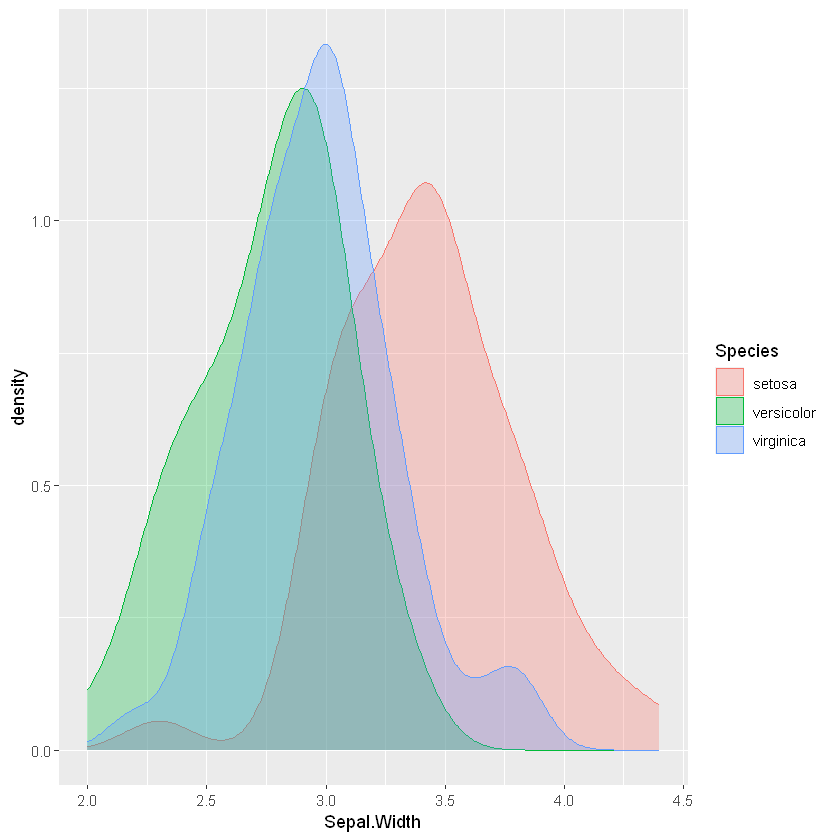

In [3]:
# Group, color, and fill by Species
ggplot(iris, aes(x=Sepal.Width)) +
  geom_density(aes(group=Species, color=Species, fill=Species), alpha=0.3)

We can see that all three have approximately normally distributed populations so we can continue with our one-way ANOVA test.

## One-way ANOVA
Next, let's perform our ANOVA test. We'll use the aov() function and pass in our variables in the correct order. We'll save our results to an object we name ANOVA.

In [4]:
help(aov)

aov {stats},R Documentation
formula,A formula specifying the model.
data,"A data frame in which the variables specified in the formula will be found. If missing, the variables are searched for in the standard way."
projections,Logical flag: should the projections be returned?
qr,Logical flag: should the QR decomposition be returned?
contrasts,"A list of contrasts to be used for some of the factors in the formula. These are not used for any Error term, and supplying contrasts for factors only in the Error term will give a warning."
...,"Arguments to be passed to lm, such as subset or na.action. See ‘Details’ about weights."


In [2]:
ANOVA <- aov(Sepal.Width ~ Species, data=iris) # (DV ~ IV, data=dataset)
summary(ANOVA) # View results of the ANOVA test

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We can see that the p-value is less than our alpha 0.05 significance level we've chosen, which means we reject the null hypothesis that the differences between the means are not statistically significant and instead accept the alternative hypothesis that the differences between at least one of the means is statistically significant. Our extremely low p-value means that there is a 0.00000000000002% chance we are wrong in our decision to reject the null hypothesis.  Next, we'll run post-hoc tests, such as Tukey's Honest Significant Difference test, to determine which species have significantly different means.

- if p.value > alpha => H0 is valid and if we have found some differences in the distribution it depends only on casuality
- if p.value < alpha => H0 is not valid and we accept the alternative hypotesis.

remember: The relationship between two variances is described by a F distribution. F is the ratio of between-goup/within-goup variance. 

This value will be approximately equal to 1 if H0  is correct, and will tend to be larger if H0 is not true

### so once rejected the null hypothesis, the question is what means that the differences between spices is statistically significatnt? Lets use the Turkey's Honest Test

## Post-hoc Tests
### Tukey's Honest Significant Difference Test
Performing this test is easy as it requires only one line. We pass in our ANOVA object to the TukeyHSD function.

In [8]:
T <- TukeyHSD(ANOVA)
T

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


This output indicates that the differences versicolor-setosa, virginica-setosa and virginica-versicolor are significant.

Using an alpha of 0.05, we can see that the p adj value is less than our alpha in all three pairwise comparisons meaning there is a significant difference between all three species' means. We can use the mosaic package to visualize the results of TukeyHSD. We pass the TukeyHSD() function into the mplot() function.

 A more “easy” way to interpret this output is visualizing the confidence intervals for the mean differences.

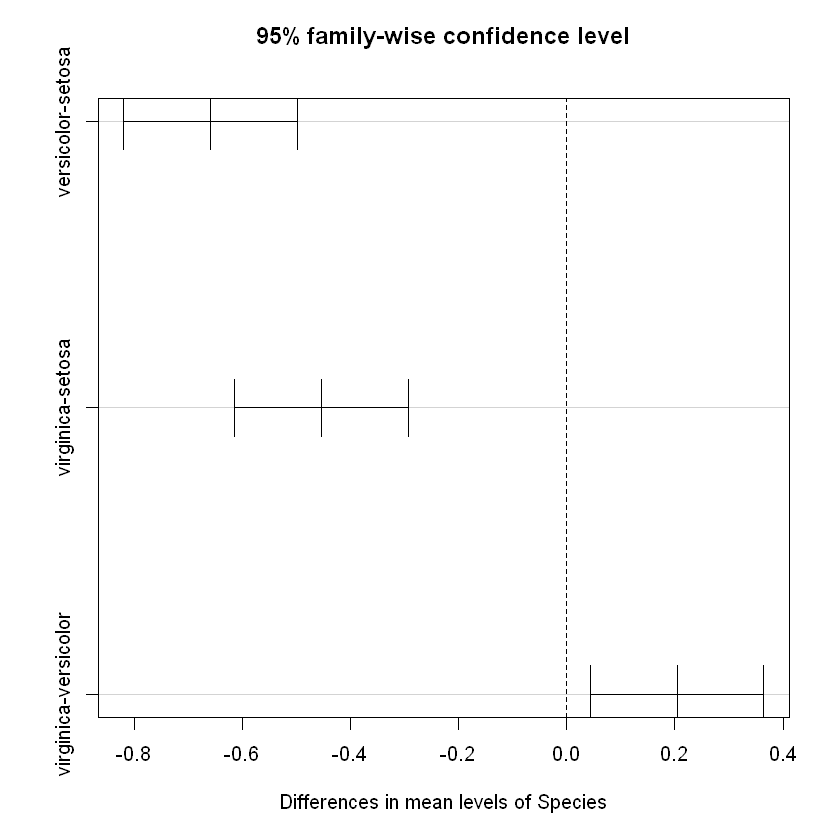

In [9]:
plot(T)


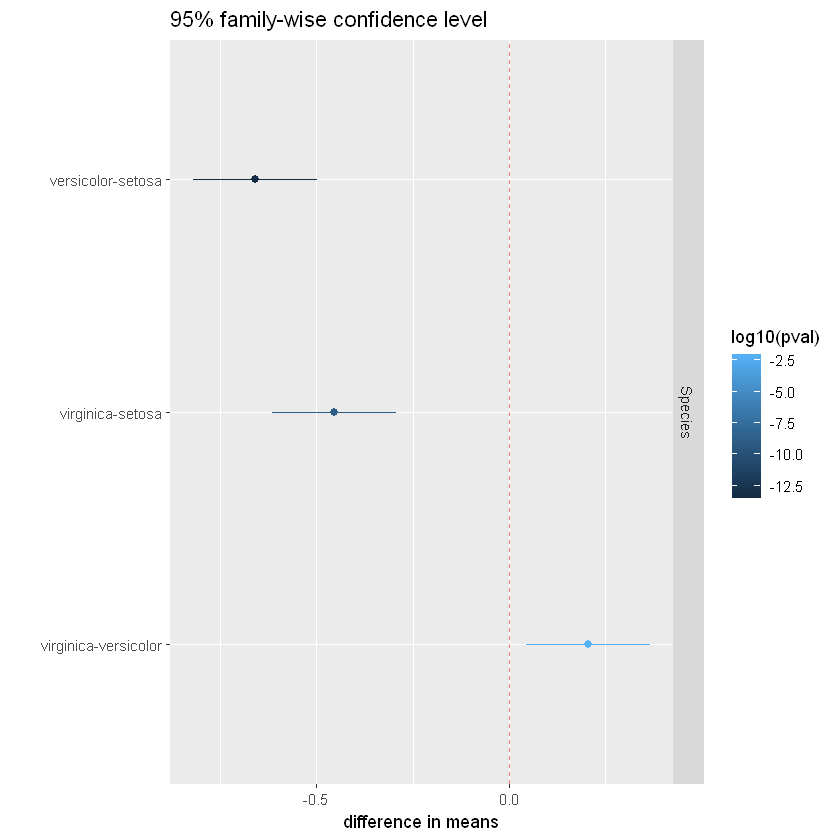

In [10]:
mplot(TukeyHSD(ANOVA), system="ggplot") # Use the mosaic package to plot the results of TukeyHSD

### Pairwise T-Test
If you prefer to do t-tests, you can use the following method to perform pairwise t-tests on all your factor levels. The pairwise.t.test() function allows you to choose between eight p-value adjustments to help counteract the problem of multiple comparisons: holm, hochberg, hommel, bonferroni, BH, BY, fdr, and none. To reduce the chance of incorrectly rejecting our null hypothesis (Type I error) we'll use the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) method when performing our multiple comparisons.

In [11]:
pairwise.t.test(iris$Sepal.Width, iris$Species, 
                p.adj="bonferroni", paired=FALSE)


	Pairwise comparisons using t tests with pooled SD 

data:  iris$Sepal.Width and iris$Species 

           setosa  versicolor
versicolor < 2e-16 -         
virginica  1.4e-09 0.0094    

P value adjustment method: bonferroni 

Our t-test comparisons show that all three species' means are significantly different because all p-values are less than our 0.05 alpha.

## References

1. [One-way ANOVAs in R – including post-hocs/t-tests and graphs](https://www.r-bloggers.com/one-way-anovas-in-r-–-including-post-hocst-tests-and-graphs/) by Hayward Godwin
2. [What is ANOVA?](http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/anova/basics/what-is-anova/) by Minitab
3. [Analysis of variance](https://en.wikipedia.org/wiki/Analysis_of_variance) by Wikipedia
4. [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) by Wikipedia
5. [Tukey's range test](https://en.wikipedia.org/wiki/Tukey%27s_range_test) by Wikipedia
6. [ANOVA and Tukey’s test on R](https://www.r-bloggers.com/anova-and-tukeys-test-on-r/) by Flavio Barros
7. [Graphics with the mosaic package](https://cran.r-project.org/web/packages/mosaic/vignettes/GraphicsWithMosaic.html) by Randall Pruim
8. [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) by Wikipedia